In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from collections import Counter

In [2]:
pip install matplotlib



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
ls

1cleaned_games.csv    games.csv             venv/
2cleaned_vgsales.csv  games_Project.ipynb   vgsales.csv


In [7]:
games = pd.read_csv('games.csv')


In [8]:
games.isnull().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [9]:
games['Team'].fillna('Unknown', inplace=True)

median_rating = games['Rating'].median()
games['Rating'].fillna(median_rating, inplace=True)

games['Summary'].fillna('', inplace=True)



/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/2005359934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Team'].fillna('Unknown', inplace=True)
/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/2005359934.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [10]:
games.isnull().sum()

Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [11]:
games.drop_duplicates(subset=['Title', 'Reviews'], inplace=True)



In [12]:
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')


In [13]:
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010-12-22,['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,2019-05-21,"['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,2012-05-22,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,2020-10-06,['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [14]:

for col in games:
    games[col] = games[col].astype(str).str.replace(r'[\[\],]', '', regex=True).str.strip()

In [15]:
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,'Bandai Namco Entertainment' 'FromSoftware',4.5,3.9K,3.9K,'Adventure' 'RPG',Elden Ring is a fantasy action and open world ...,"""The first playthrough of elden ring is one of...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,'Supergiant Games',4.3,2.9K,2.9K,'Adventure' 'Brawler' 'Indie' 'RPG',A rogue-lite hack and slash dungeon crawler in...,'convinced this is a roguelike for people who ...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,'Nintendo' 'Nintendo EPD Production Group No. 3',4.4,4.3K,4.3K,'Adventure' 'RPG',The Legend of Zelda: Breath of the Wild is the...,'This game is the game (that is not CS:GO) tha...,30K,2.5K,5K,2.6K
3,3,Undertale,2015-09-15,'tobyfox' '8-4',4.2,3.5K,3.5K,'Adventure' 'Indie' 'RPG' 'Turn Based Strategy',A small child falls into the Underground where...,'soundtrack is tied for #1 with nier automata....,28K,679,4.9K,1.8K
4,4,Hollow Knight,2017-02-24,'Team Cherry',4.4,3K,3K,'Adventure' 'Indie' 'Platform',A 2D metroidvania with an emphasis on close co...,"""this games worldbuilding is incredible with i...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010-12-22,'Telltale Games',3.2,94,94,'Adventure' 'Point-and-Click',Back to the Future: The Game is one of Telltal...,'Very enjoyable game. The story adds onto the ...,763,5,223,67
1508,1508,Team Sonic Racing,2019-05-21,'Sumo Digital' 'Sega',2.9,264,264,'Arcade' 'Racing',Team Sonic Racing combines the best elements o...,"'jogo morto mas bom' 'not my cup of tea' ""Comp...",1.5K,49,413,107
1509,1509,Dragon's Dogma,2012-05-22,'Capcom',3.7,210,210,'Brawler' 'RPG',Set in a huge open world Dragon’s Dogma: Dark ...,'Underrated.' 'A grandes rasgos es como un MMO...,1.1K,45,487,206
1510,1510,Baldur's Gate 3,2020-10-06,'Larian Studios',4.1,165,165,'Adventure' 'RPG' 'Strategy' 'Tactical' 'Turn ...,An ancient evil has returned to Baldur's Gate ...,'Bu türe bu oyunla girmeye çalışmak hataydı sa...,269,79,388,602


In [16]:
for col in ['Genres', 'Reviews', 'Team']:
    if col in games.columns:
        games[col] = games[col].astype(str).str.lower().str.strip()

In [17]:
def parse_k(val):
    if isinstance(val, str) and 'K' in val:
        return float(val.replace('K', '')) * 1000
    return float(val) if isinstance(val, str) else val
    

In [18]:
games['Number of Reviews'] = games['Number of Reviews'].apply(parse_k)
games['Plays'] = games['Plays'].apply(parse_k)
games['Playing'] = games['Playing'].apply(parse_k)
games['Backlogs'] = games['Backlogs'].apply(parse_k)
games['Wishlist'] = games['Wishlist'].apply(parse_k)
games['Title'] = games['Title'].str.lower().str.strip()

In [19]:
games.head(4)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,elden ring,2022-02-25,'bandai namco entertainment' 'fromsoftware',4.5,3.9K,3900.0,'adventure' 'rpg',Elden Ring is a fantasy action and open world ...,"""the first playthrough of elden ring is one of...",17000.0,3800.0,4600.0,4800.0
1,1,hades,2019-12-10,'supergiant games',4.3,2.9K,2900.0,'adventure' 'brawler' 'indie' 'rpg',A rogue-lite hack and slash dungeon crawler in...,'convinced this is a roguelike for people who ...,21000.0,3200.0,6300.0,3600.0
2,2,the legend of zelda: breath of the wild,2017-03-03,'nintendo' 'nintendo epd production group no. 3',4.4,4.3K,4300.0,'adventure' 'rpg',The Legend of Zelda: Breath of the Wild is the...,'this game is the game (that is not cs:go) tha...,30000.0,2500.0,5000.0,2600.0
3,3,undertale,2015-09-15,'tobyfox' '8-4',4.2,3.5K,3500.0,'adventure' 'indie' 'rpg' 'turn based strategy',A small child falls into the Underground where...,'soundtrack is tied for #1 with nier automata....,28000.0,679.0,4900.0,1800.0


In [20]:
sales = pd.read_csv('vgsales.csv')

In [21]:
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [22]:
mode_year = sales['Year'].mode()[0]
sales['Year'].fillna(mode_year, inplace=True)

sales['Publisher'].fillna('unknown', inplace=True)

/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/3480498138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Year'].fillna(mode_year, inplace=True)
/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/3480498138.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [23]:
sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [24]:
sales.drop_duplicates(subset=['Name', 'Platform'], inplace=True)

In [25]:
for col in ['Genre', 'Platform', 'Publisher']:
    if col in sales.columns:
        sales[col] = sales[col].astype(str).str.strip().str.lower()

In [26]:
sales.head(4)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,wii,2006.0,sports,nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,nes,1985.0,platform,nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,wii,2008.0,racing,nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,wii,2009.0,sports,nintendo,15.75,11.01,3.28,2.96,33.00


In [27]:
games.to_csv("1cleaned_games.csv", index=False)


In [28]:
sales.to_csv("2cleaned_vgsales.csv", index=False)

In [29]:
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,elden ring,2022-02-25,'bandai namco entertainment' 'fromsoftware',4.5,3.9K,3900.0,'adventure' 'rpg',Elden Ring is a fantasy action and open world ...,"""the first playthrough of elden ring is one of...",17000.0,3800.0,4600.0,4800.0
1,1,hades,2019-12-10,'supergiant games',4.3,2.9K,2900.0,'adventure' 'brawler' 'indie' 'rpg',A rogue-lite hack and slash dungeon crawler in...,'convinced this is a roguelike for people who ...,21000.0,3200.0,6300.0,3600.0
2,2,the legend of zelda: breath of the wild,2017-03-03,'nintendo' 'nintendo epd production group no. 3',4.4,4.3K,4300.0,'adventure' 'rpg',The Legend of Zelda: Breath of the Wild is the...,'this game is the game (that is not cs:go) tha...,30000.0,2500.0,5000.0,2600.0
3,3,undertale,2015-09-15,'tobyfox' '8-4',4.2,3.5K,3500.0,'adventure' 'indie' 'rpg' 'turn based strategy',A small child falls into the Underground where...,'soundtrack is tied for #1 with nier automata....,28000.0,679.0,4900.0,1800.0
4,4,hollow knight,2017-02-24,'team cherry',4.4,3K,3000.0,'adventure' 'indie' 'platform',A 2D metroidvania with an emphasis on close co...,"""this games worldbuilding is incredible with i...",21000.0,2400.0,8300.0,2300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,back to the future: the game,2010-12-22,'telltale games',3.2,94,94.0,'adventure' 'point-and-click',Back to the Future: The Game is one of Telltal...,'very enjoyable game. the story adds onto the ...,763.0,5.0,223.0,67.0
1508,1508,team sonic racing,2019-05-21,'sumo digital' 'sega',2.9,264,264.0,'arcade' 'racing',Team Sonic Racing combines the best elements o...,"'jogo morto mas bom' 'not my cup of tea' ""comp...",1500.0,49.0,413.0,107.0
1509,1509,dragon's dogma,2012-05-22,'capcom',3.7,210,210.0,'brawler' 'rpg',Set in a huge open world Dragon’s Dogma: Dark ...,'underrated.' 'a grandes rasgos es como un mmo...,1100.0,45.0,487.0,206.0
1510,1510,baldur's gate 3,2020-10-06,'larian studios',4.1,165,165.0,'adventure' 'rpg' 'strategy' 'tactical' 'turn ...,An ancient evil has returned to Baldur's Gate ...,'bu türe bu oyunla girmeye çalışmak hataydı sa...,269.0,79.0,388.0,602.0


In [30]:
sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,wii,2006.0,sports,nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,nes,1985.0,platform,nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,wii,2008.0,racing,nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,wii,2009.0,sports,nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,gba,2002.0,platform,kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,gc,2003.0,shooter,infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,ps2,2008.0,racing,activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,ds,2010.0,puzzle,7g//ames,0.00,0.01,0.00,0.00,0.01


In [31]:
#games.rename(columns={'Title': 'Name'}, inplace=True)
games.drop(columns=['Title'], inplace=True)
games['Name'] = sales['Name'].iloc[:len(games)].values

Merge_file = pd.merge(games, sales, on='Name',how = 'inner')

In [32]:
Merge_file.head(4)

,Unnamed: 0,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,...,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,2022-02-25,'bandai namco entertainment' 'fromsoftware',4.5,3.9K,3900.0,'adventure' 'rpg',Elden Ring is a fantasy action and open world ...,"""the first playthrough of elden ring is one of...",17000.0,...,1,wii,2006.0,sports,nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2019-12-10,'supergiant games',4.3,2.9K,2900.0,'adventure' 'brawler' 'indie' 'rpg',A rogue-lite hack and slash dungeon crawler in...,'convinced this is a roguelike for people who ...,21000.0,...,2,nes,1985.0,platform,nintendo,29.08,3.58,6.81,0.77,40.24
2,1,2019-12-10,'supergiant games',4.3,2.9K,2900.0,'adventure' 'brawler' 'indie' 'rpg',A rogue-lite hack and slash dungeon crawler in...,'convinced this is a roguelike for people who ...,21000.0,...,201,gb,1999.0,platform,nintendo,3.40,1.30,0.15,0.22,5.07
3,2,2017-03-03,'nintendo' 'nintendo epd production group no. 3',4.4,4.3K,4300.0,'adventure' 'rpg',The Legend of Zelda: Breath of the Wild is the...,'this game is the game (that is not cs:go) tha...,30000.0,...,3,wii,2008.0,racing,nintendo,15.85,12.88,3.79,3.31,35.82


In [33]:
Merge_file.isna().sum()

Unnamed: 0           0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Name                 0
Rank                 0
Platform             0
Year                 0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [34]:
Merge_file.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2841    False
2842    False
2843    False
2844    False
2845    False
Length: 2846, dtype: bool

/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/726988180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


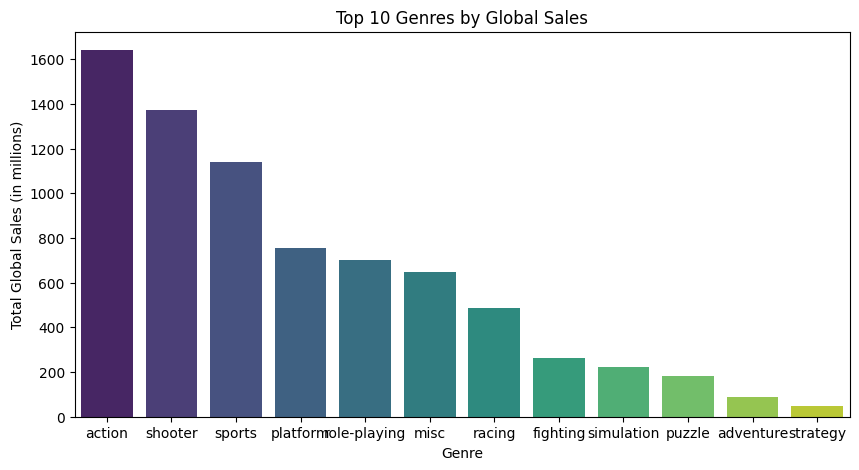

In [35]:
top_genres = Merge_file.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.title("Top 10 Genres by Global Sales")
plt.xlabel("Genre")
plt.ylabel("Total Global Sales (in millions)")
plt.show()

/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/563398588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="coolwarm")


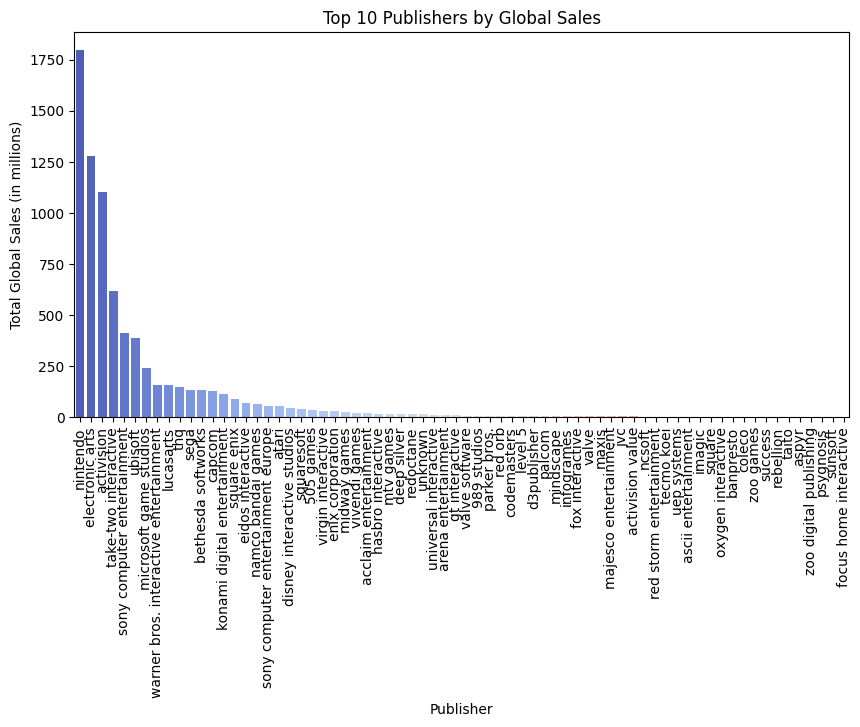

In [36]:
top_publishers = Merge_file.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="coolwarm")
plt.title("Top 10 Publishers by Global Sales")
plt.xlabel("Publisher")
plt.ylabel("Total Global Sales (in millions)")
plt.xticks(rotation=90)
plt.show()

/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/425389099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.index, y=top_platforms.values, palette="magma")


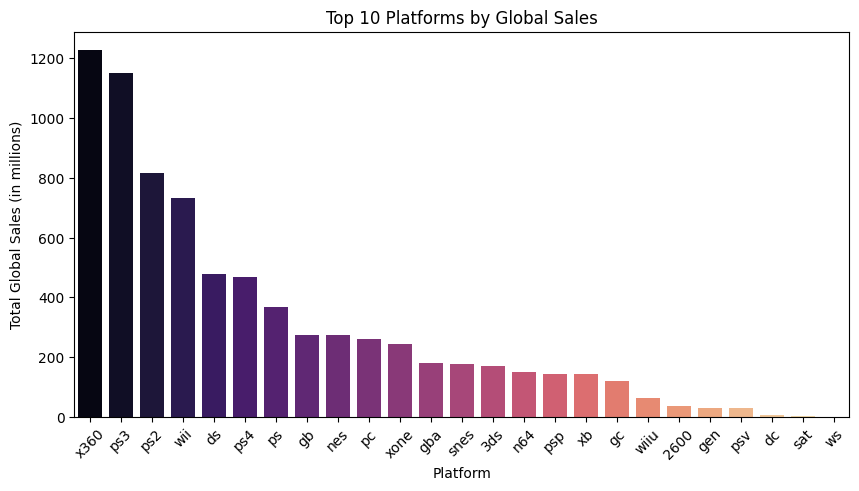

In [37]:
top_platforms = Merge_file.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=top_platforms.index, y=top_platforms.values, palette="magma")
plt.title("Top 10 Platforms by Global Sales")
plt.xlabel("Platform")
plt.ylabel("Total Global Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

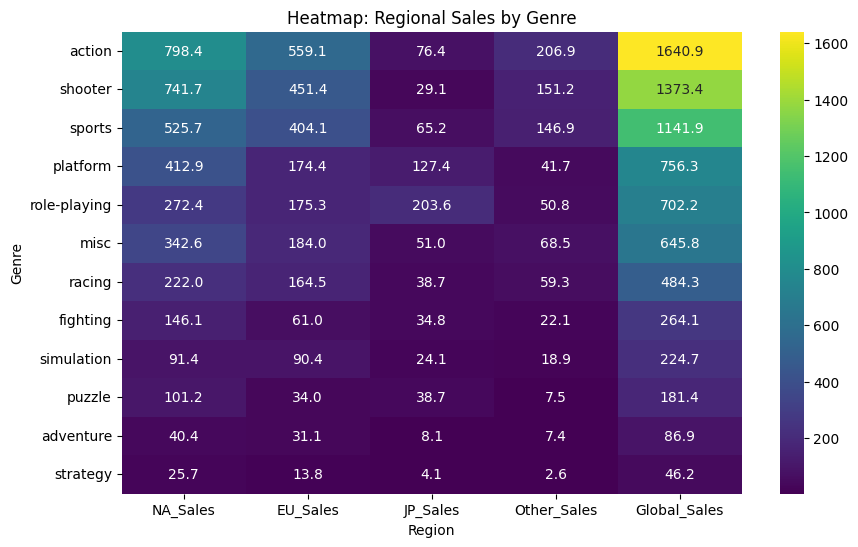

In [38]:
#Heatmaps: Global sales and regional breakdowns.

sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

genre_sales = Merge_file.groupby("Genre")[sales_cols].sum().sort_values("Global_Sales", ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(genre_sales, annot=True, fmt=".1f", cmap="viridis")
plt.title("Heatmap: Regional Sales by Genre")
plt.xlabel("Region")
plt.ylabel("Genre")
plt.show()

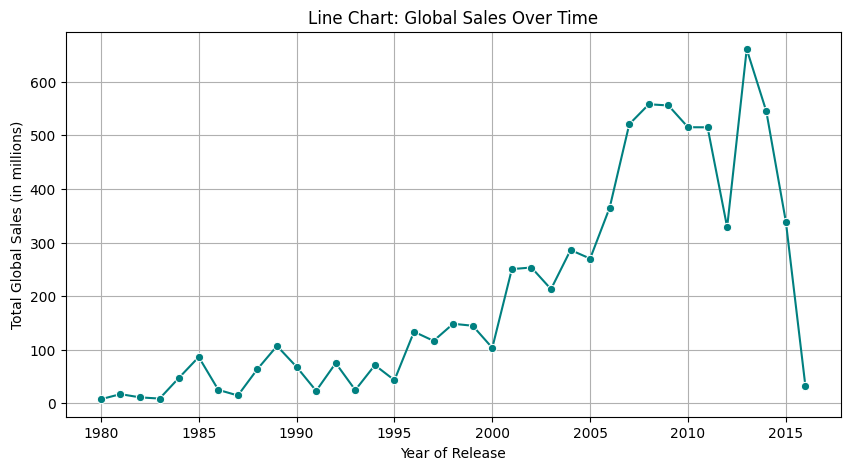

In [39]:
#Line charts: Sales and wishlist trends over time.

sales_trend = Merge_file.groupby("Year")["Global_Sales"].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Global_Sales", data=sales_trend, marker="o", color="teal")
plt.title("Line Chart: Global Sales Over Time")
plt.xlabel("Year of Release")
plt.ylabel("Total Global Sales (in millions)")
plt.grid(True)
plt.show()

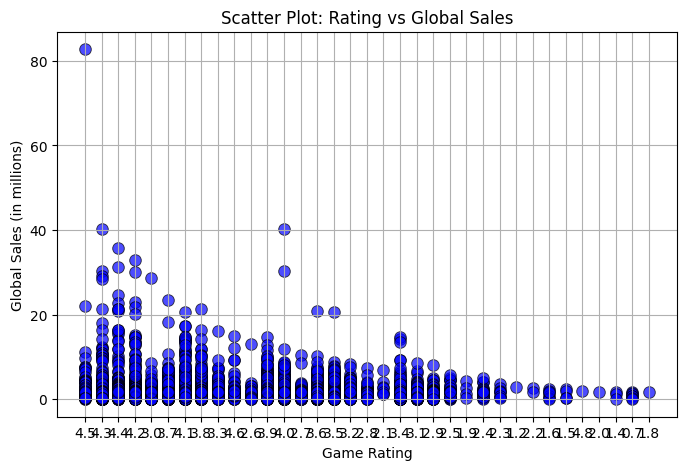

In [40]:
#Scatter plots: Ratings vs. sales or wishlist.

plt.figure(figsize=(8,5))
sns.scatterplot(x="Rating", y="Global_Sales", data=Merge_file, color="blue", s=70, alpha=0.7, edgecolor="black")

plt.title("Scatter Plot: Rating vs Global Sales")
plt.xlabel("Game Rating")
plt.ylabel("Global Sales (in millions)")
plt.grid(True)
plt.show()

#  Exploratory Data Analysis (EDA)


#games.csv (Game Metadata Only)

# What are the top-rated games by user reviews?

In [41]:
games_df = pd.read_csv('1cleaned_games.csv')
sales_df = pd.read_csv('2cleaned_vgsales.csv')

/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/1224250624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top['Title'], x=top['Rating'], palette='viridis')


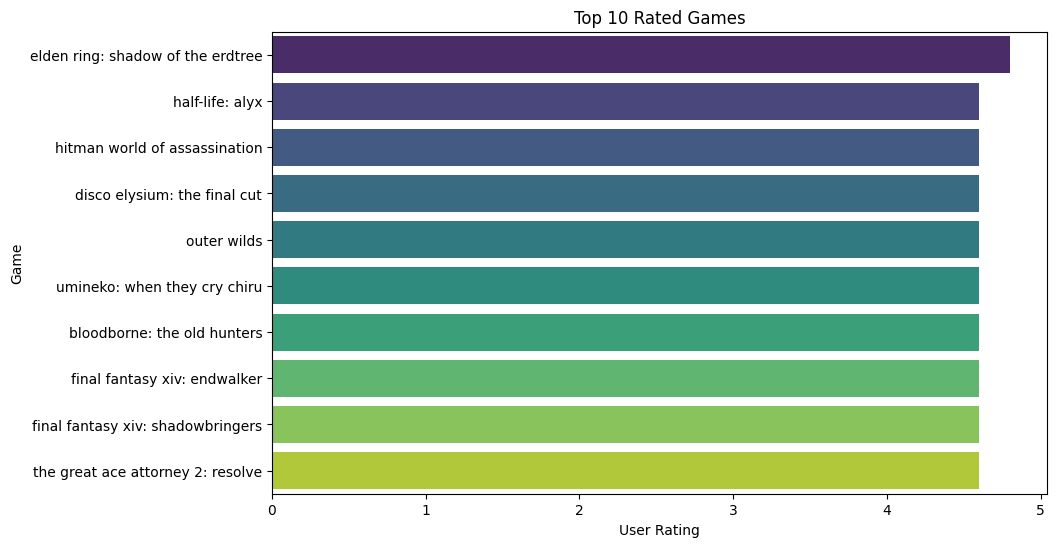

In [42]:
top = games_df.sort_values('Rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top['Title'], x=top['Rating'], palette='viridis')
plt.title('Top 10 Rated Games')
plt.xlabel('User Rating')
plt.ylabel('Game')
plt.show()

# 2. 🧑‍🤝‍🧑 Which developers (Teams) have the highest average ratings?

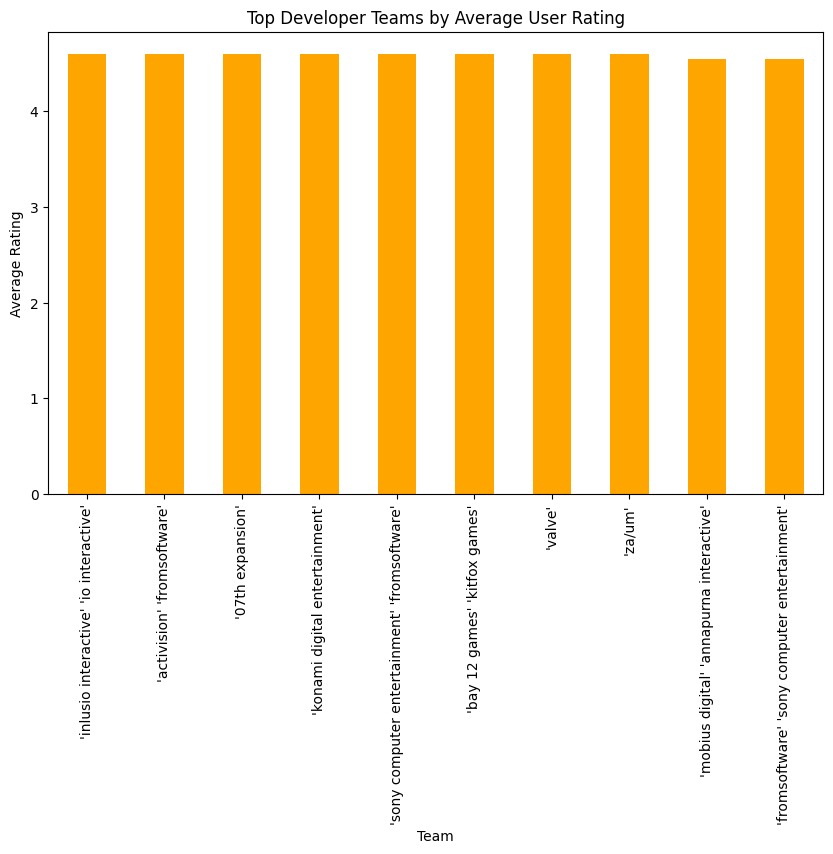

In [43]:
dev_avgs = games_df.groupby('Team')['Rating'].mean().sort_values(ascending=False).head(10)
dev_avgs.plot(kind='bar', figsize=(10,6), color='orange')
plt.ylabel('Average Rating')
plt.title('Top Developer Teams by Average User Rating')
plt.show()

# 3. 🧩 What are the most common genres in the dataset?

<Axes: >

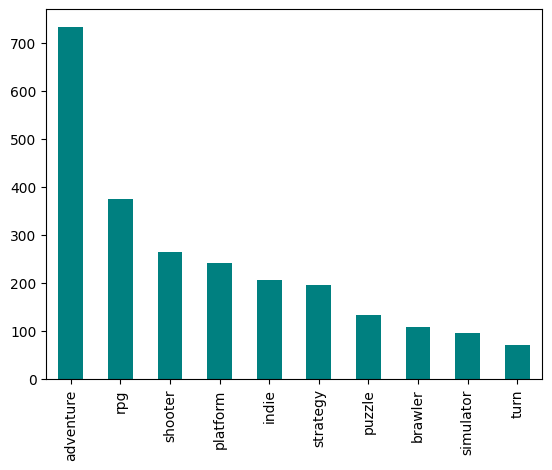

In [44]:
genre_list = (
    games_df['Genres']
    .dropna()                      # remove NaN rows
    .astype(str)                   # ensure they’re strings
    .str.replace("'", '', regex=False)
    .str.split()
)

genres = [item for sublist in genre_list for item in sublist]
cnt = pd.Series(Counter(genres)).sort_values(ascending=False)
cnt.head(10).plot(kind='bar', color='teal')

# 4. ⏳ Which games have the highest backlog compared to wishlist?

                           Title  Backlogs  Wishlist  backlog_wishlist_ratio
440                     paladins     188.0      16.0               11.058824
906                      figment     392.0      35.0               10.888889
561                     fortnite     470.0      47.0                9.791667
506    half-life: opposing force     838.0      95.0                8.729167
618                   pokémon go     197.0      22.0                8.565217
677                    destiny 2     845.0     103.0                8.125000
755        bioshock 2 remastered    2000.0     246.0                8.097166
765  borderlands: the pre-sequel    1900.0     238.0                7.949791
689                   brawlhalla     294.0      36.0                7.945946
837          pubg: battlegrounds     253.0      32.0                7.666667


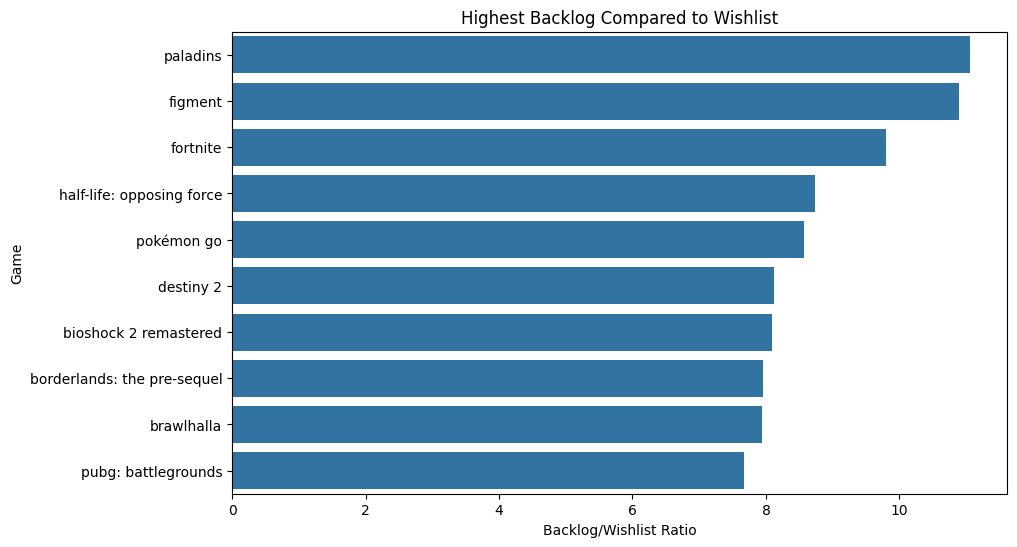

In [45]:
games_df['backlog_wishlist_ratio'] = games_df['Backlogs'] / (games_df['Wishlist'] + 1)
backlog_vs_wishlist = games_df.sort_values('backlog_wishlist_ratio', ascending=False).head(10)
print(backlog_vs_wishlist[['Title', 'Backlogs', 'Wishlist', 'backlog_wishlist_ratio']])

plt.figure(figsize=(10,6))
sns.barplot(data=backlog_vs_wishlist, y='Title', x='backlog_wishlist_ratio')
plt.title('Highest Backlog Compared to Wishlist')
plt.xlabel('Backlog/Wishlist Ratio')
plt.ylabel('Game')
plt.show()

# 5 🗓️ What is the game release trend across years?

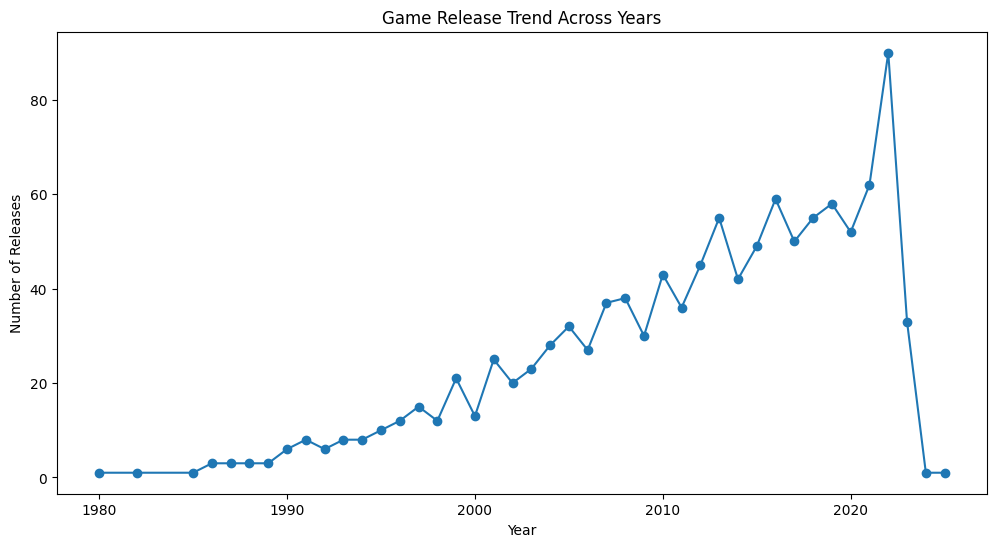

In [46]:
games_df['Release_year'] = pd.to_datetime(games_df['Release Date'], errors='coerce').dt.year
release_trend = games_df['Release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
release_trend.plot(kind='line', marker='o')
plt.title('Game Release Trend Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

# 6. 🔎 What is the distribution of user ratings?

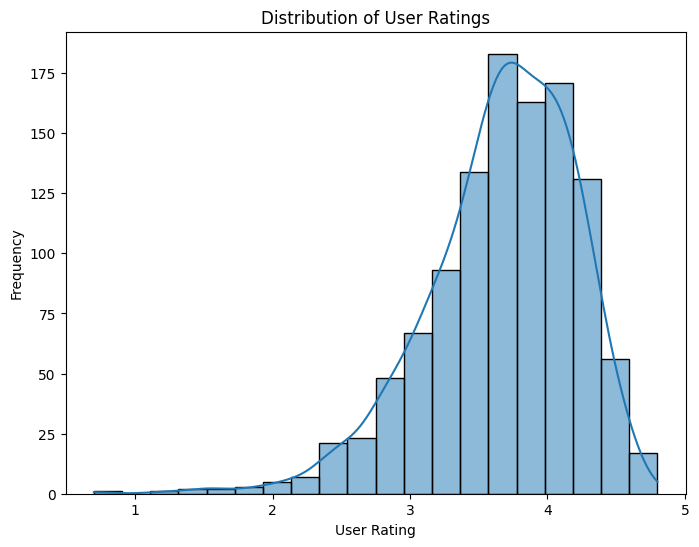

In [47]:
plt.figure(figsize=(8,6))
sns.histplot(games_df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

# 7.🧑 What are the top 10 most wishlisted games?

                                         Title  Wishlist
626  the legend of zelda: tears of the kingdom    5400.0
0                                   elden ring    4800.0
555                                 elden ring    4800.0
6                                        omori    3800.0
31         nier replicant ver.1.22474487139...    3700.0
1                                        hades    3600.0
9                               nier: automata    3600.0
35                   sekiro: shadows die twice    3400.0
11                                       stray    3400.0
14                                  bloodborne    3300.0


/var/folders/lw/shhcshms0hd28zypy2__xz0m0000gp/T/ipykernel_7500/442465928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_wishlisted, y='Title', x='Wishlist', palette='plasma')


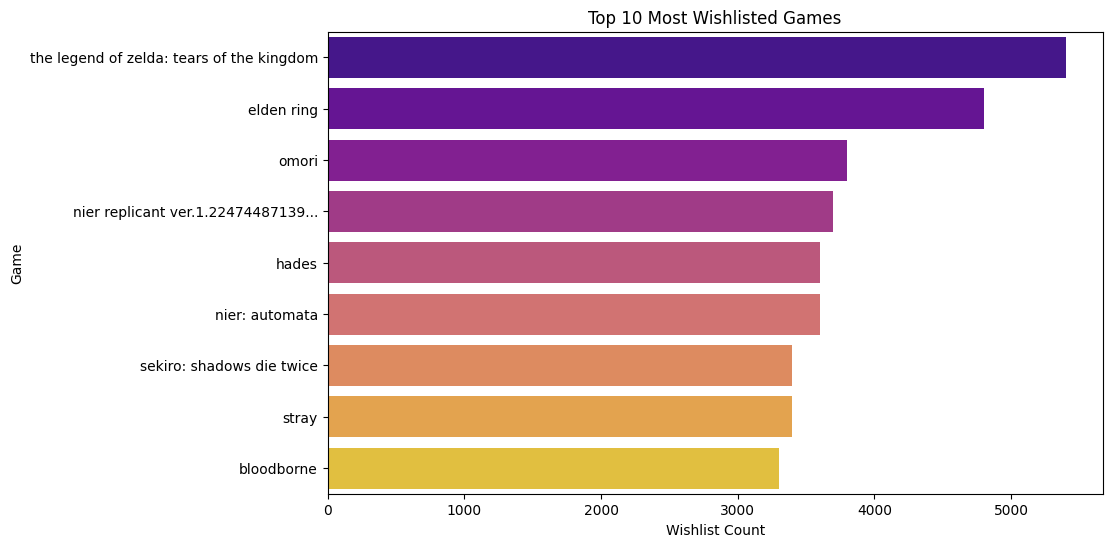

In [48]:
top_wishlisted = games_df.sort_values('Wishlist', ascending=False).head(10)
print(top_wishlisted[['Title', 'Wishlist']])

plt.figure(figsize=(10,6))
sns.barplot(data=top_wishlisted, y='Title', x='Wishlist', palette='plasma')
plt.title('Top 10 Most Wishlisted Games')
plt.xlabel('Wishlist Count')
plt.ylabel('Game')
plt.show()

# 8.🔬 What’s the average number of plays per genre?

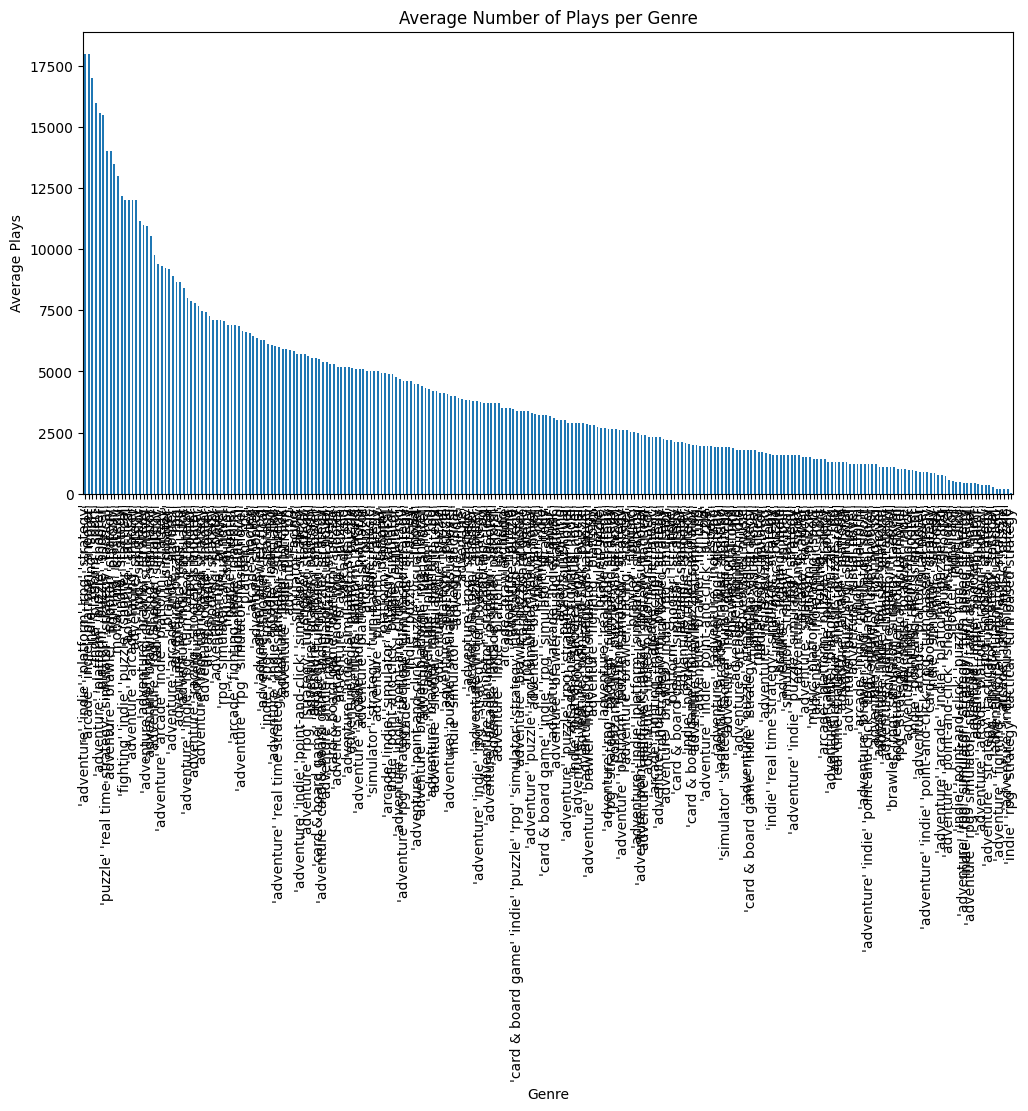

In [49]:
genre_play_map = {}
for _, row in games_df.iterrows():
    genres = row['Genres'].split(', ') if pd.notna(row['Genres']) else []
    for g in genres:
        if g not in genre_play_map:
            genre_play_map[g] = []
        genre_play_map[g].append(row['Plays'])
genre_play_averages = {g: np.mean(lst) for g, lst in genre_play_map.items()}
avg_play_per_genre = pd.Series(genre_play_averages).sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_play_per_genre.plot(kind='bar')
plt.title('Average Number of Plays per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Plays')
plt.show()

# 9.🏢 Which developer studios are the most productive and impactful?

                                            Total Games  Average Rating
Team                                                                   
'capcom'                                             26        3.665385
'square enix'                                        22        3.918182
'nintendo'                                           12        3.691667
'nintendo' 'game freak'                              12        3.775000
'intelligent systems co. ltd.' 'nintendo'            11        3.600000
'nintendo' 'nintendo ead'                            11        3.727273
'nintendo ead' 'nintendo'                            10        3.820000
'konami'                                              9        3.644444
'ubisoft montreal' 'ubisoft entertainment'            8        3.350000
'sonic team' 'sega'                                   7        3.485714


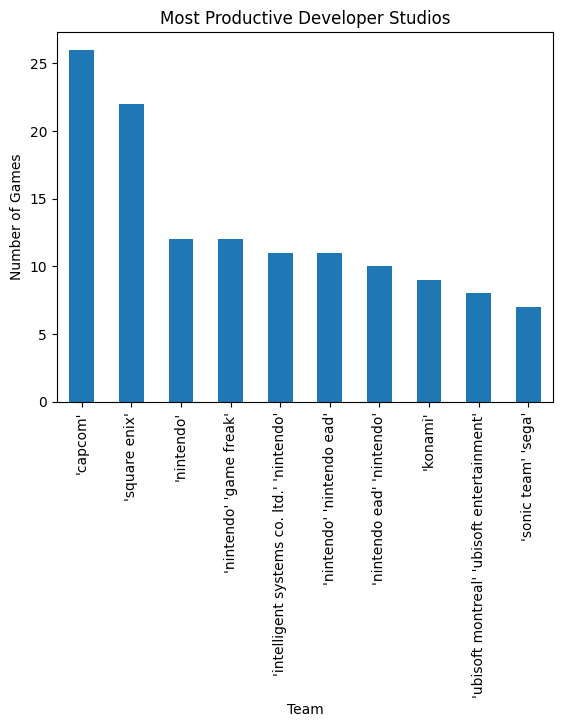

In [50]:
studio_counts = games_df.groupby('Team').size().sort_values(ascending=False)
studio_effect = games_df.groupby('Team')['Rating'].mean()
studio_productive_impactful = pd.DataFrame({
    'Total Games': studio_counts,
    'Average Rating': studio_effect
}).sort_values('Total Games', ascending=False).head(10)
print(studio_productive_impactful)

studio_productive_impactful.plot(y='Total Games', kind='bar', legend=False, title='Most Productive Developer Studios')
plt.ylabel('Number of Games')
plt.show()

# 💰 vgsales.csv (Sales Data Only)

# 1. 🌍 Which region generates the most game sales?

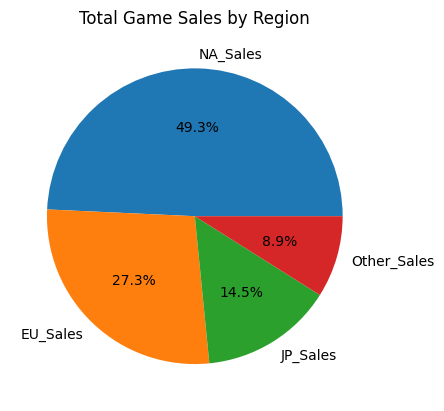

In [51]:
regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
sales[regions].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Game Sales by Region')
plt.ylabel('')
plt.show()

# 10. 🕹️ What are the best-selling platforms?

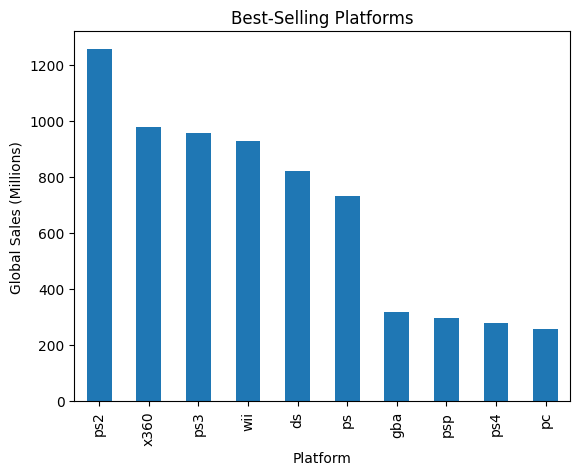

In [52]:
plat_sales = sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plat_sales.plot(kind='bar')
plt.ylabel('Global Sales (Millions)')
plt.title('Best-Selling Platforms')
plt.show()

# 12.📅 What’s the trend of game releases and sales over years?

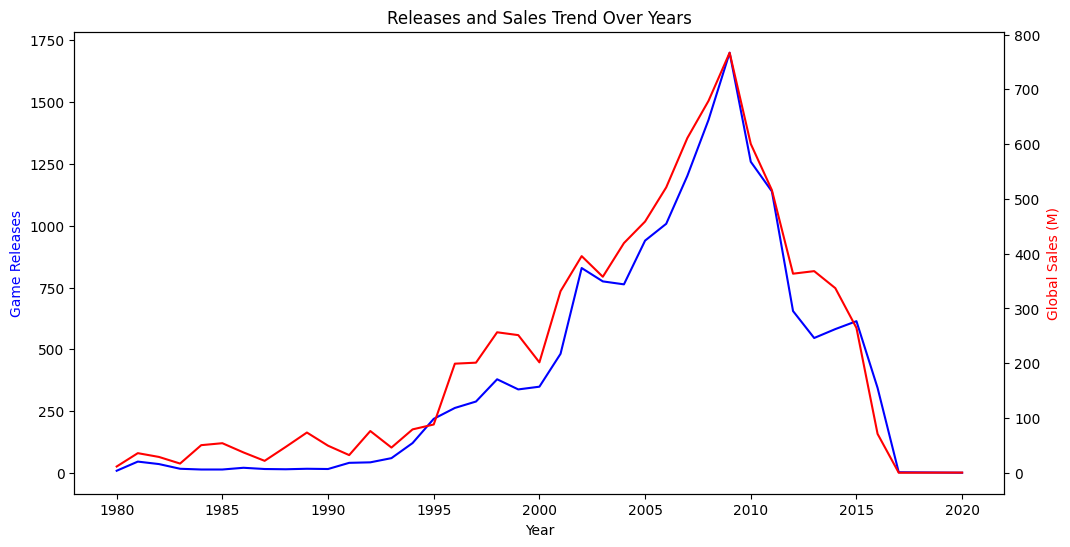

In [54]:
fig, ax1 = plt.subplots(figsize=(12,6))
sales['Year'] = sales['Year'].astype(int)
ax1.plot(sales['Year'].value_counts().sort_index(), color='b')
ax2 = ax1.twinx()
ax2.plot(sales.groupby('Year')['Global_Sales'].sum().sort_index(), color='r')
ax1.set_xlabel('Year')
ax1.set_ylabel('Game Releases', color='b')
ax2.set_ylabel('Global Sales (M)', color='r')
plt.title('Releases and Sales Trend Over Years')
plt.show()

# 13.🏢 Who are the top publishers by sales?

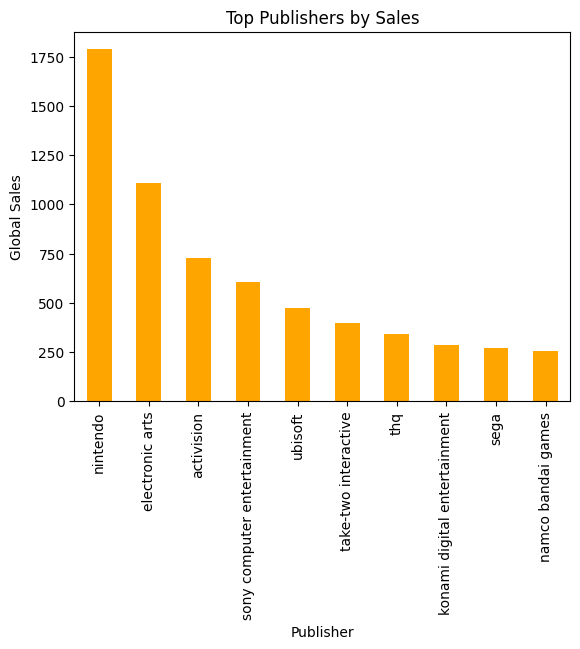

In [55]:
pub_sales = sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
pub_sales.plot(kind='bar', color='orange')
plt.ylabel('Global Sales')
plt.title('Top Publishers by Sales')
plt.show()

# 14. 🔝 Which games are the top 10 best-sellers globally?

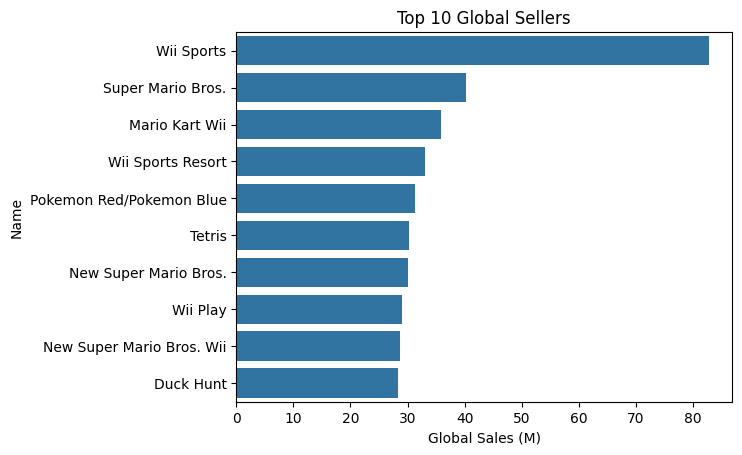

In [56]:
top10 = sales.sort_values('Global_Sales', ascending=False).head(10)
sns.barplot(y=top10['Name'], x=top10['Global_Sales'])
plt.title('Top 10 Global Sellers')
plt.xlabel('Global Sales (M)')
plt.show()

# 15.🧭 How do regional sales compare for specific platforms?

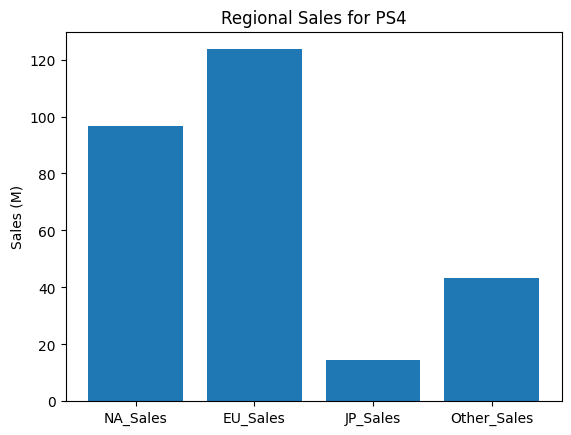

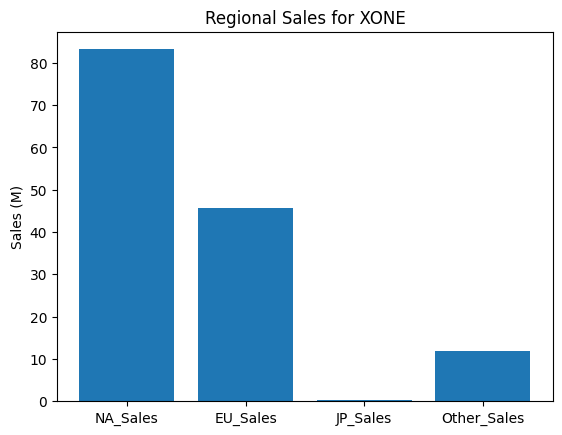

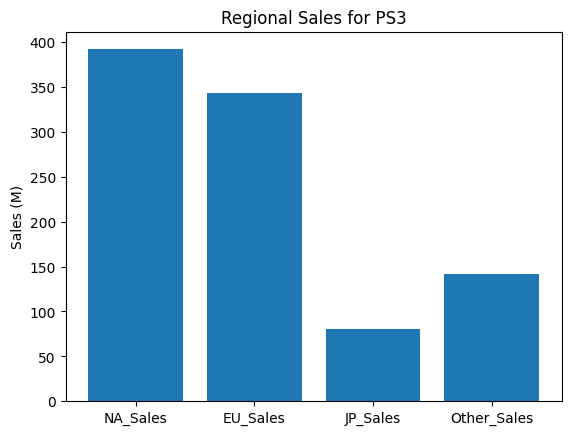

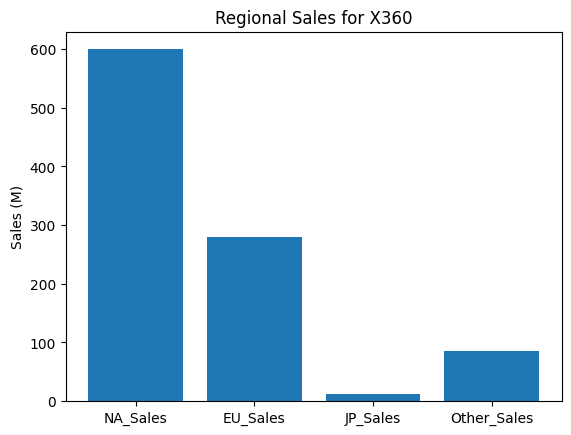

In [57]:
for plat in ['ps4', 'xone', 'ps3', 'x360']:
    subset = sales[sales['Platform']==plat]
    plt.bar(regions, subset[regions].sum())
    plt.title(f'Regional Sales for {plat.upper()}')
    plt.ylabel('Sales (M)')
    plt.show()

# 16.📈 How has the market evolved by platform over time?

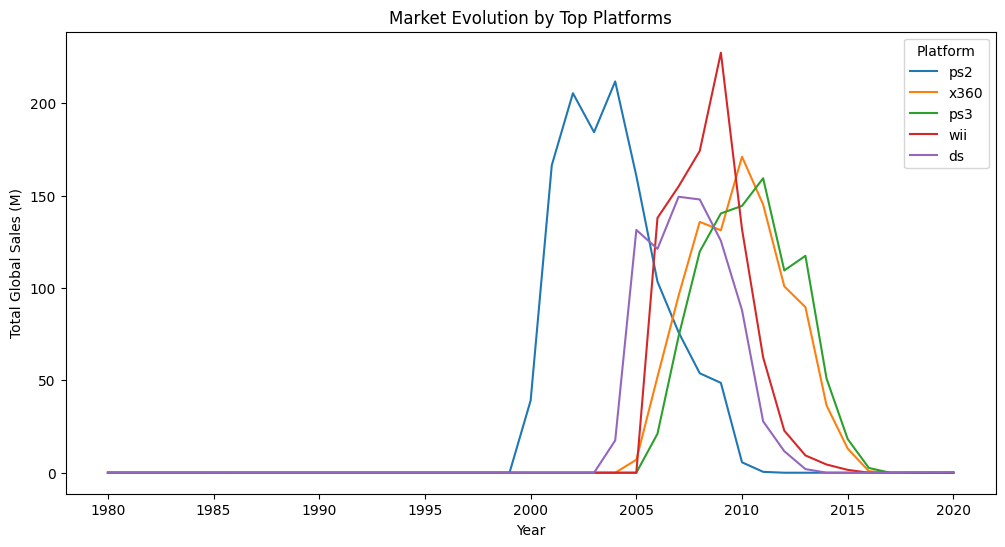

In [58]:
pivot = sales.pivot_table(index='Year', columns='Platform', values='Global_Sales', aggfunc='sum').fillna(0)
top5 = pivot.sum().sort_values(ascending=False).head(5).index
pivot[top5].plot(figsize=(12,6))
plt.title('Market Evolution by Top Platforms')
plt.ylabel('Total Global Sales (M)')
plt.show()

# 17. 📍 What are the regional genre preferences?

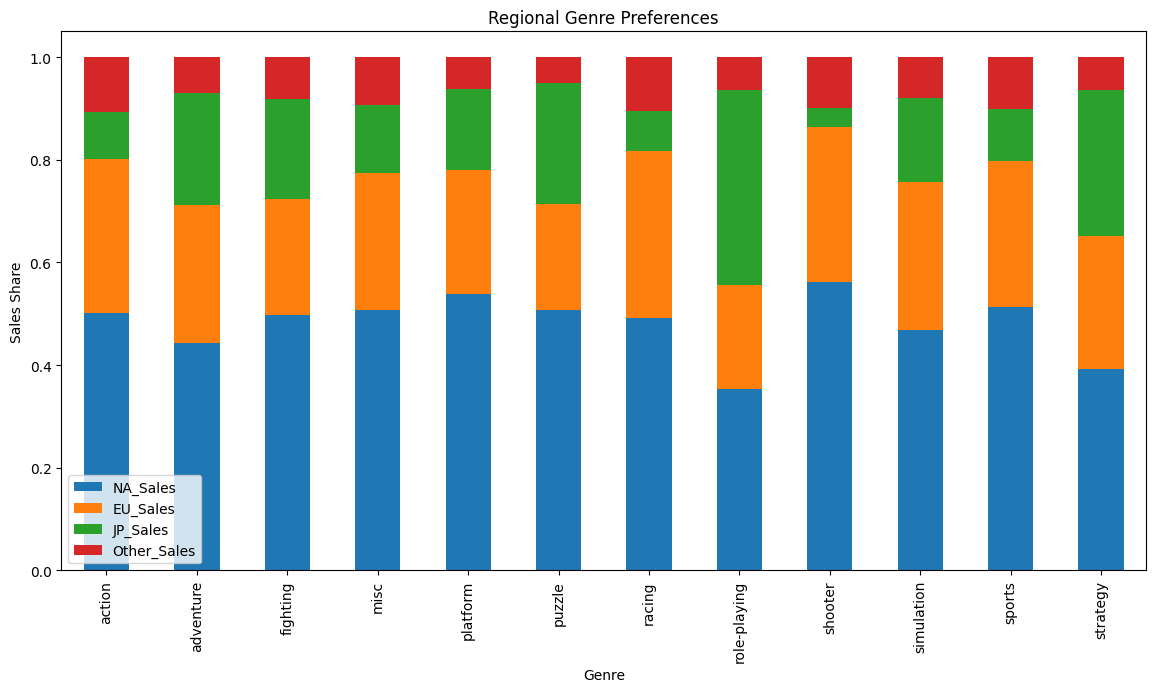

In [59]:
genre_region = sales.groupby('Genre')[regions].sum()
genre_region.div(genre_region.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Regional Genre Preferences')
plt.ylabel('Sales Share')
plt.show()

# 18.🔄 What’s the yearly sales change per region?

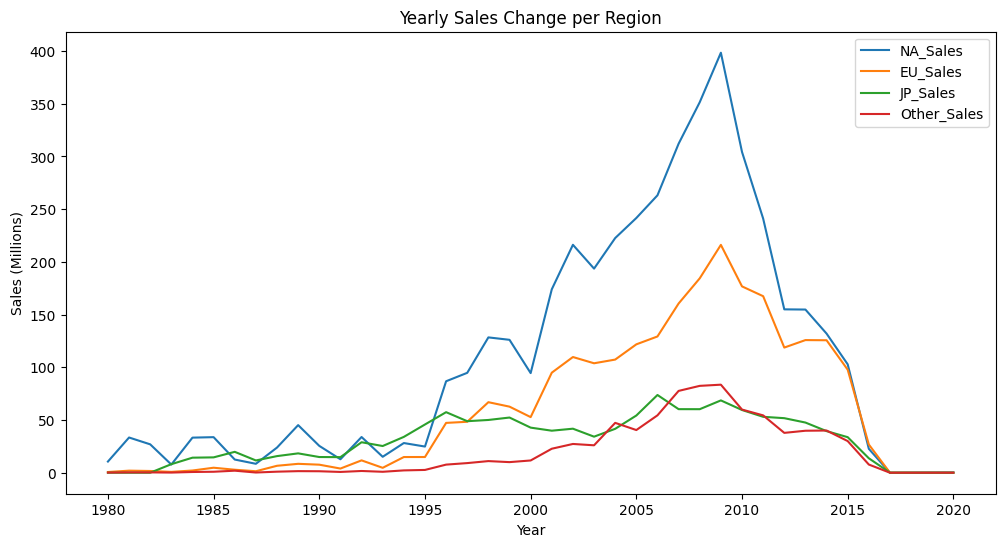

In [60]:
region_year = sales.groupby('Year')[regions].sum()
region_year.plot(figsize=(12,6))
plt.title('Yearly Sales Change per Region')
plt.ylabel('Sales (Millions)')
plt.show()

# 19.🧮 What is the average sales per publisher?

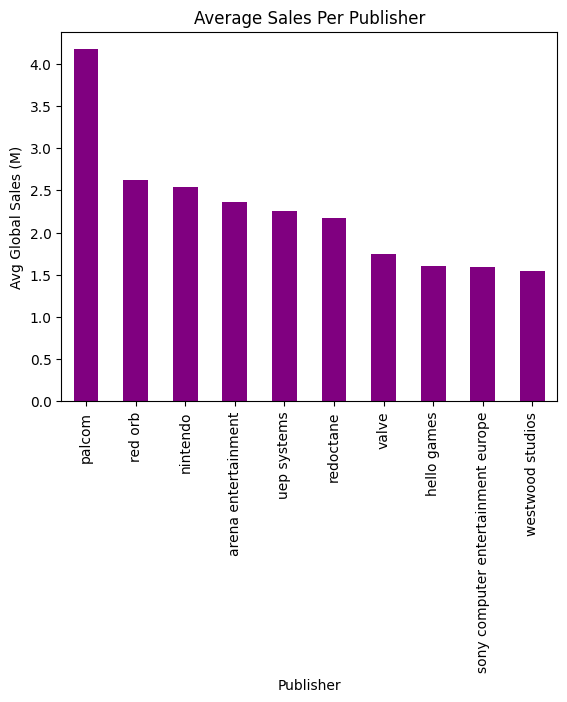

In [61]:
avg_sales = sales.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
avg_sales.plot(kind='bar', color='purple')
plt.title('Average Sales Per Publisher')
plt.ylabel('Avg Global Sales (M)')
plt.show()

# 20.🏆 What are the top 5 best-selling games per platform?

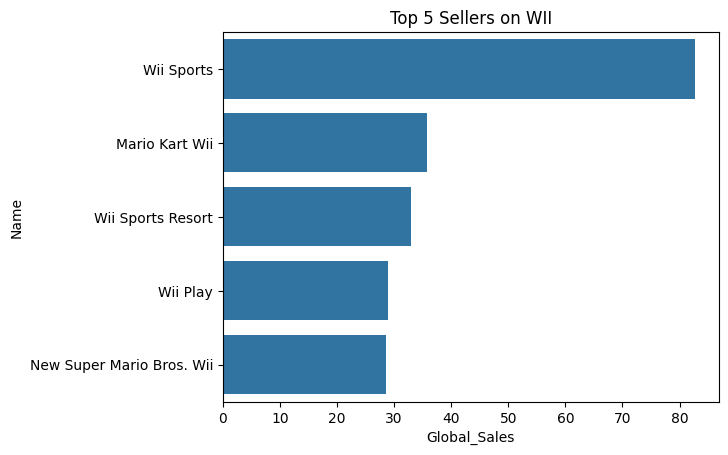

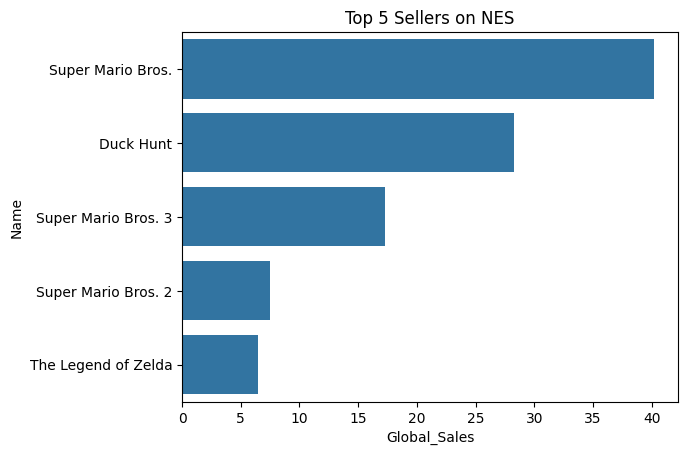

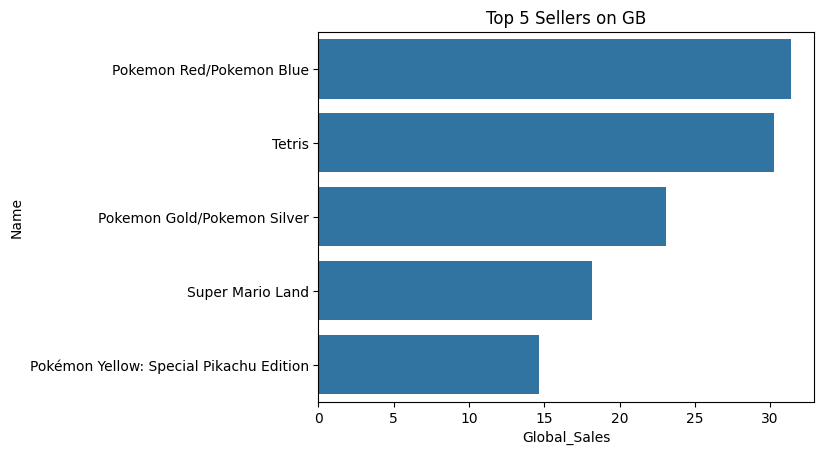

In [62]:
for plat in sales['Platform'].unique()[:3]: # Example for 3 platforms
    top5 = sales[sales['Platform']==plat].nlargest(5, 'Global_Sales')
    sns.barplot(y=top5['Name'], x=top5['Global_Sales'])
    plt.title(f'Top 5 Sellers on {plat.upper()}')
    plt.show()

# 🔁 Merged Dataset (Sales + Engagement + Ratings)

# 21.🎮 Which game genres generate the most global sales?

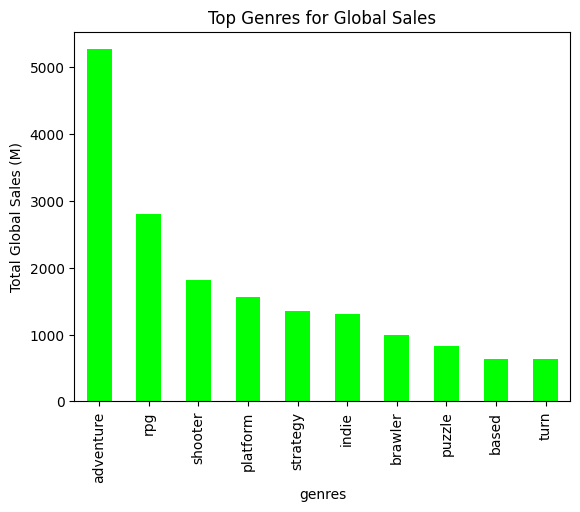

In [65]:
melted = Merge_file.assign(genres=Merge_file['Genres'].str.replace("'",'').str.split()).explode('genres')
by_genre = melted.groupby('genres')['Global_Sales'].sum().sort_values(ascending=False).head(10)
by_genre.plot(kind='bar', color='lime')
plt.title('Top Genres for Global Sales')
plt.ylabel('Total Global Sales (M)')
plt.show()

# 22.🎯 How does user rating affect global sales?

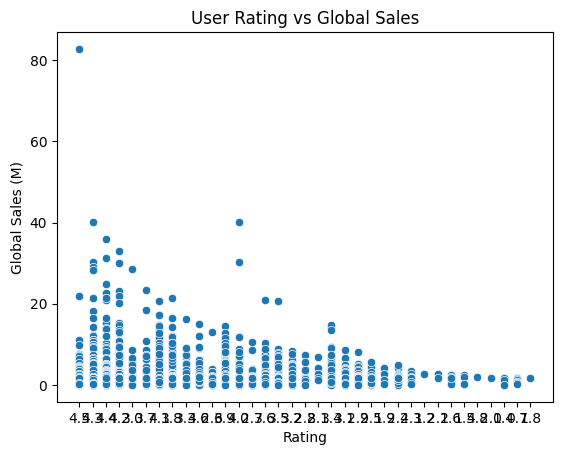

In [66]:
sns.scatterplot(x='Rating', y='Global_Sales', data=Merge_file)
plt.title('User Rating vs Global Sales')
plt.xlabel('Rating')
plt.ylabel('Global Sales (M)')
plt.show()

# 23. 🕹️ Which platforms have the most games with high ratings (e.g., above 4)?

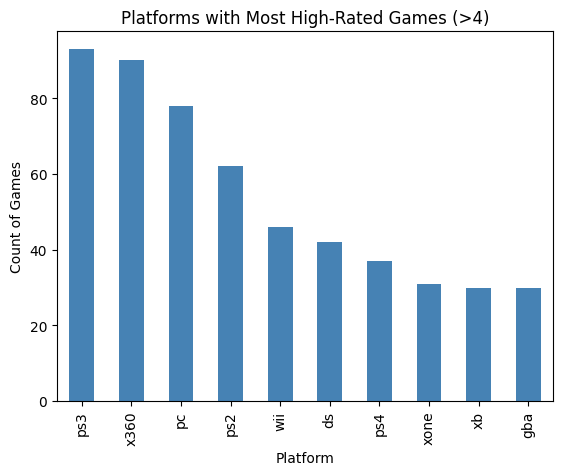

In [68]:
Merge_file['Rating'] = pd.to_numeric(Merge_file['Rating'], errors='coerce')


high_rated = Merge_file[Merge_file['Rating'] > 4]
high_rated['Platform'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Platforms with Most High-Rated Games (>4)')
plt.xlabel('Platform')
plt.ylabel('Count of Games')
plt.show()

# 24.📈 What’s the trend of releases and sales over time?

In [70]:
Merge_file['release_year'] = pd.to_datetime(Merge_file['Release Date']).dt.year
trend = Merge_file.groupby('release_year').agg({'Global_Sales':'sum', 'Title':'count'})
trend.rename(columns={'Title':'Num_Releases'}, inplace=True)
trend.plot(y=['Num_Releases','Global_Sales'], secondary_y='Global_Sales', figsize=(12,6))
plt.title('Releases and Global Sales Over Time')
plt.show()

KeyError: "Column(s) ['Title'] do not exist"